# Analysis of Used Cars Data With Manufactored Years 1970 to 2024 in the United Kingdom
In the automobile industry, the data would usually consists of the name of manufacturers, a car's characteristics like make, model, year, the price of a car, etc. From my observation on `Cars.ipynb`, the dataset from Kaggle consists of both numerical and categorical data. Additionally, there's no relationships between the majority of the presented variables. Finally, this data's characteristics align with unlabelled data. The goal is to determine a suitable action to take on using this data to train a machine. 

## Recap 
Below are the following steps that I've taken from `Cars.ipynb`.

In [221]:
#import a python library to import the csv file
import pandas as pd

cars = pd.read_csv("CarsData.csv")
cars.sample(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
69013,E Class,2018,27326,Semi-Auto,12443,Diesel,145,70.6,2.0,merc
16940,Kodiaq,2017,21000,Automatic,34250,Diesel,145,49.6,2.0,skoda
59258,Fabia,2018,10699,Manual,7205,Petrol,150,61.4,1.0,skoda
43251,I30,2017,11500,Manual,14440,Petrol,150,52.3,1.4,hyundi
46691,3 Series,2020,30940,Semi-Auto,1586,Diesel,150,50.4,2.0,BMW
22977,Tucson,2019,19642,Semi-Auto,2837,Petrol,145,36.2,1.6,hyundi
96443,Octavia,2015,8694,Manual,50049,Petrol,30,53.3,1.4,skoda
13857,E Class,2015,15700,Automatic,34075,Diesel,125,58.9,2.1,merc
79567,EcoSport,2018,13790,Manual,15000,Petrol,145,54.3,1.0,ford
75483,A5,2018,22990,Manual,25448,Petrol,145,48.7,2.0,Audi


In [222]:
#rename price column to price_in_euros for clarity
cars.rename(columns={'price':'price_in_euros'}, inplace=True)

In [223]:
#create a table describing each column in the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           97712 non-null  object 
 1   year            97712 non-null  int64  
 2   price_in_euros  97712 non-null  int64  
 3   transmission    97712 non-null  object 
 4   mileage         97712 non-null  int64  
 5   fuelType        97712 non-null  object 
 6   tax             97712 non-null  int64  
 7   mpg             97712 non-null  float64
 8   engineSize      97712 non-null  float64
 9   Manufacturer    97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


Each column has 97,712 values. The majority of the columns are either object or int, which means this dataset has both numerical and categorical data.

In [224]:
#provide a short summary of what are the unique variables in each column
pd.Series({col:cars[col].unique() for col in cars})

model             [ I10,  Polo,  2 Series,  Yeti Outdoor,  Fiest...
year              [2017, 2019, 2018, 2016, 2020, 2015, 2014, 201...
price_in_euros    [7495, 10989, 27990, 12495, 7999, 26791, 17990...
transmission                  [Manual, Semi-Auto, Automatic, Other]
mileage           [11630, 9200, 1614, 30960, 19353, 2373, 7038, ...
fuelType                  [Petrol, Diesel, Hybrid, Other, Electric]
tax               [145, 150, 125, 135, 30, 0, 20, 205, 200, 160,...
mpg               [60.1, 58.9, 49.6, 62.8, 54.3, 74.3, 34.4, 30....
engineSize        [1.0, 2.0, 1.2, 1.8, 1.5, 2.1, 1.4, 2.5, 1.6, ...
Manufacturer      [hyundi, volkswagen, BMW, skoda, ford, toyota,...
dtype: object

In [225]:
#provide a short summary of how many unique variables in each column
cars.nunique()

model               196
year                 27
price_in_euros    13236
transmission          4
mileage           42214
fuelType              5
tax                  48
mpg                 208
engineSize           40
Manufacturer          9
dtype: int64

There are 9 manufacturers making 196 different kinds of car models combined. These manufacturers make cars with 5 different fuel types and 4 kinds of transmissions. This dataset has a high cardinality.

In [226]:
cars.describe()

,year,price_in_euros,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


The summary table above paints a general picture of the kind of distribution in statistics on the numerical side of this dataset. Please keep in mind that it's not possible for the "year" column to have mean and standard deviation values. On the numerical side of this dataset, it appears that the mean value overall varies greatly from one numerical column to another, which also applies to standard deviation (std), minimum, median (50%), and other values presented in the summary table. This dataset doesn't have a uniform distribution where each column in the table have equally likely outcomes.

In [227]:
#import matplotlib to plot graphs
import matplotlib.pyplot as plt
cars_numeric = cars[["year", "price_in_euros", "mileage", "tax", "mpg", "engineSize"]]
cars_numeric

,year,price_in_euros,mileage,tax,mpg,engineSize
0,2017,7495,11630,145,60.1,1.0
1,2017,10989,9200,145,58.9,1.0
2,2019,27990,1614,145,49.6,2.0
3,2017,12495,30960,150,62.8,2.0
4,2017,7999,19353,125,54.3,1.2
...,...,...,...,...,...,...
97707,2017,10447,8337,145,54.3,1.0
97708,2014,14995,25372,30,61.4,2.0
97709,2017,8950,19910,125,54.3,1.2
97710,2017,10700,24468,125,50.4,1.4


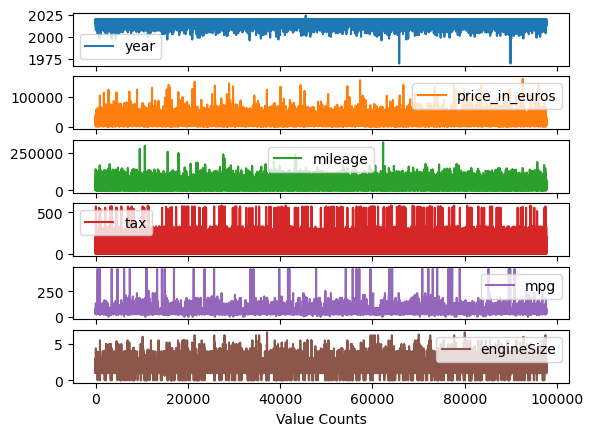

In [228]:
cars_numeric.plot(subplots=True)
#plt.tight_layout()
plt.xlabel("Value Counts")
plt.show()

A huge portion of the numerical side to this dataset reflects cars with manufactored years from 2000 and onwards. Out of all the columns, mileage doesn't appear to fluctuate as much as mpg, tax, engineSize, or price_in_euros.

Text(0.5, 1.0, 'Mileage vs Price_In_Euros')

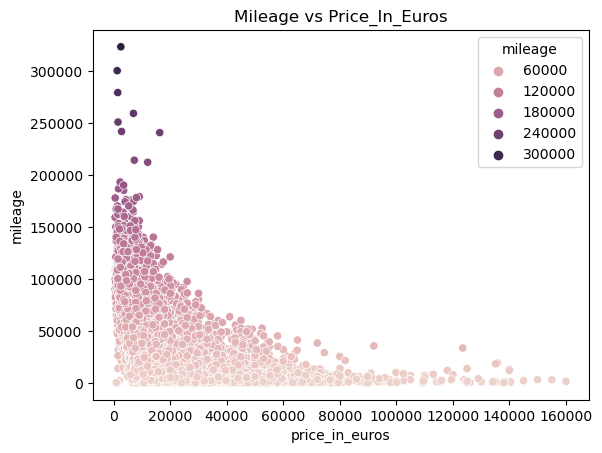

In [229]:
#do a scatterplot on mileage vs price_in_euros
import seaborn as sns
sns.scatterplot(data=cars_numeric, x='price_in_euros', y='mileage', hue='mileage').set_title("Mileage vs Price_In_Euros")

The "Mileage vs Price_In_Euros" graph shows that a considerable portion in mileage reside below 65,000 euros. Additionally, most of the darker areas are below 25,000 euros whereas most of the lighter areas are above 25,000 euros.

Text(0.5, 1.0, 'Tax vs EngineSize')

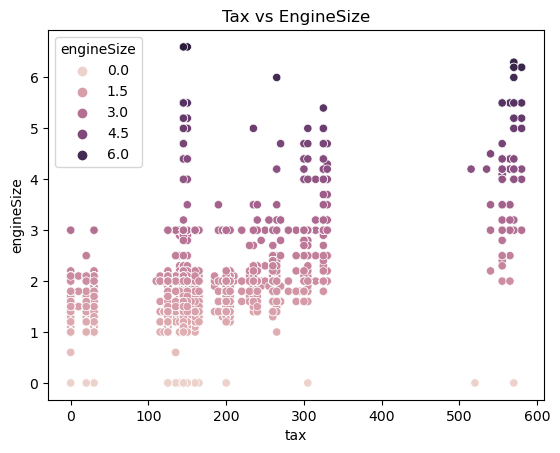

In [230]:
sns.scatterplot(data=cars_numeric, x='tax', y='engineSize', hue='engineSize').set_title("Tax vs EngineSize")

A bigger engine size does not mean larger tax. The graph above paints a picture that the tax is possibly more affected by outside factors like specific locations in the United Kingdom. The majority of the values in engineSize column resides below 350 in tax. 


When looking at the two scatterplots, I notice that it's possible to have groups of values, because a lot of these fall within a certain range. My plan is to use this dataset to train clustering algorithm. 

## Preprocessing
A lot of machine learning models like clustering algorithms do not work well with high cardinality data, so undergoing a proper data preprocessing is crucial to ensure there's minimal chance of overfitting.

In [231]:
counts = cars["model"].value_counts()
cars[cars["model"].map(counts)<=100]

#cars[cars.groupby(cars)[cars].transform('size')<=1000]

,model,year,price_in_euros,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
77,Shuttle,2019,26396,Semi-Auto,12746,Diesel,145,32.8,2.0,volkswagen
130,Antara,2015,6500,Manual,52889,Diesel,240,44.1,2.2,vauxhall
142,8 Series,2020,56990,Semi-Auto,3242,Petrol,150,33.6,3.0,BMW
204,Tiguan Allspace,2019,26998,Semi-Auto,4814,Diesel,150,39.2,2.0,volkswagen
267,Tourneo Connect,2015,9295,Manual,47904,Diesel,125,56.5,1.6,ford
...,...,...,...,...,...,...,...,...,...,...
97428,RS4,2014,24990,Semi-Auto,70823,Petrol,555,26.4,4.2,Audi
97430,Caravelle,2019,46795,Semi-Auto,6280,Diesel,145,33.6,2.0,volkswagen
97462,RS3,2020,42490,Automatic,320,Petrol,145,29.7,2.5,Audi
97655,CLA Class,2016,13795,Automatic,55700,Diesel,20,67.3,2.1,merc


In [232]:
counts = cars["model"].value_counts()
cars[cars["model"].map(counts)<=1000]

,model,year,price_in_euros,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
12,Up,2017,7990,Manual,9179,Petrol,145,64.2,1.0,volkswagen
15,RAV4,2016,20790,Automatic,32196,Hybrid,20,55.4,2.5,toyota
17,GLA Class,2016,15600,Automatic,42844,Diesel,30,64.2,2.1,merc
...,...,...,...,...,...,...,...,...,...,...
97692,Mokka,2016,8499,Manual,22635,Petrol,160,44.8,1.4,vauxhall
97694,A5,2019,31990,Automatic,1585,Petrol,145,37.2,2.0,Audi
97700,Edge,2017,22000,Automatic,17515,Diesel,145,47.9,2.0,ford
97701,Grandland X,2019,19995,Manual,12550,Diesel,145,45.6,1.5,vauxhall


In [233]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.30,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


#Call the function with a default threshold of 30%
transformed_column,new_category_list=cumulatively_categorise(cars["model"],return_categories_list=True)

In [234]:
transformed_column.describe()

count     97712
unique        9
top       Other
freq      66499
Name: model, dtype: object

In [235]:
cars["model"] = transformed_column
cars.nunique()

model                 9
year                 27
price_in_euros    13236
transmission          4
mileage           42214
fuelType              5
tax                  48
mpg                 208
engineSize           40
Manufacturer          9
dtype: int64

In [236]:
cars["model"].value_counts()

model
Other       66499
 Fiesta      6509
 Golf        4797
 Focus       4555
 C Class     3694
 Corsa       3285
 Polo        3244
 Astra       2655
 A Class     2474
Name: count, dtype: int64

In [237]:
cars_encoded = pd.get_dummies(cars, columns=["model", "transmission", "fuelType", "Manufacturer"],prefix='', prefix_sep='', dtype='int')
cars = cars.drop(["model", "transmission", "fuelType", "Manufacturer"],axis = 1)
cars

,year,price_in_euros,mileage,tax,mpg,engineSize
0,2017,7495,11630,145,60.1,1.0
1,2017,10989,9200,145,58.9,1.0
2,2019,27990,1614,145,49.6,2.0
3,2017,12495,30960,150,62.8,2.0
4,2017,7999,19353,125,54.3,1.2
...,...,...,...,...,...,...
97707,2017,10447,8337,145,54.3,1.0
97708,2014,14995,25372,30,61.4,2.0
97709,2017,8950,19910,125,54.3,1.2
97710,2017,10700,24468,125,50.4,1.4


In [238]:
cars = pd.concat([cars, cars_encoded], axis=1)
cars

,year,price_in_euros,mileage,tax,mpg,engineSize,year,price_in_euros,mileage,tax,...,Petrol,Audi,BMW,ford,hyundi,merc,skoda,toyota,vauxhall,volkswagen
0,2017,7495,11630,145,60.1,1.0,2017,7495,11630,145,...,1,0,0,0,1,0,0,0,0,0
1,2017,10989,9200,145,58.9,1.0,2017,10989,9200,145,...,1,0,0,0,0,0,0,0,0,1
2,2019,27990,1614,145,49.6,2.0,2019,27990,1614,145,...,0,0,1,0,0,0,0,0,0,0
3,2017,12495,30960,150,62.8,2.0,2017,12495,30960,150,...,0,0,0,0,0,0,1,0,0,0
4,2017,7999,19353,125,54.3,1.2,2017,7999,19353,125,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97707,2017,10447,8337,145,54.3,1.0,2017,10447,8337,145,...,1,0,0,1,0,0,0,0,0,0
97708,2014,14995,25372,30,61.4,2.0,2014,14995,25372,30,...,0,0,1,0,0,0,0,0,0,0
97709,2017,8950,19910,125,54.3,1.2,2017,8950,19910,125,...,1,0,0,1,0,0,0,0,0,0
97710,2017,10700,24468,125,50.4,1.4,2017,10700,24468,125,...,1,0,0,0,0,0,0,0,1,0
